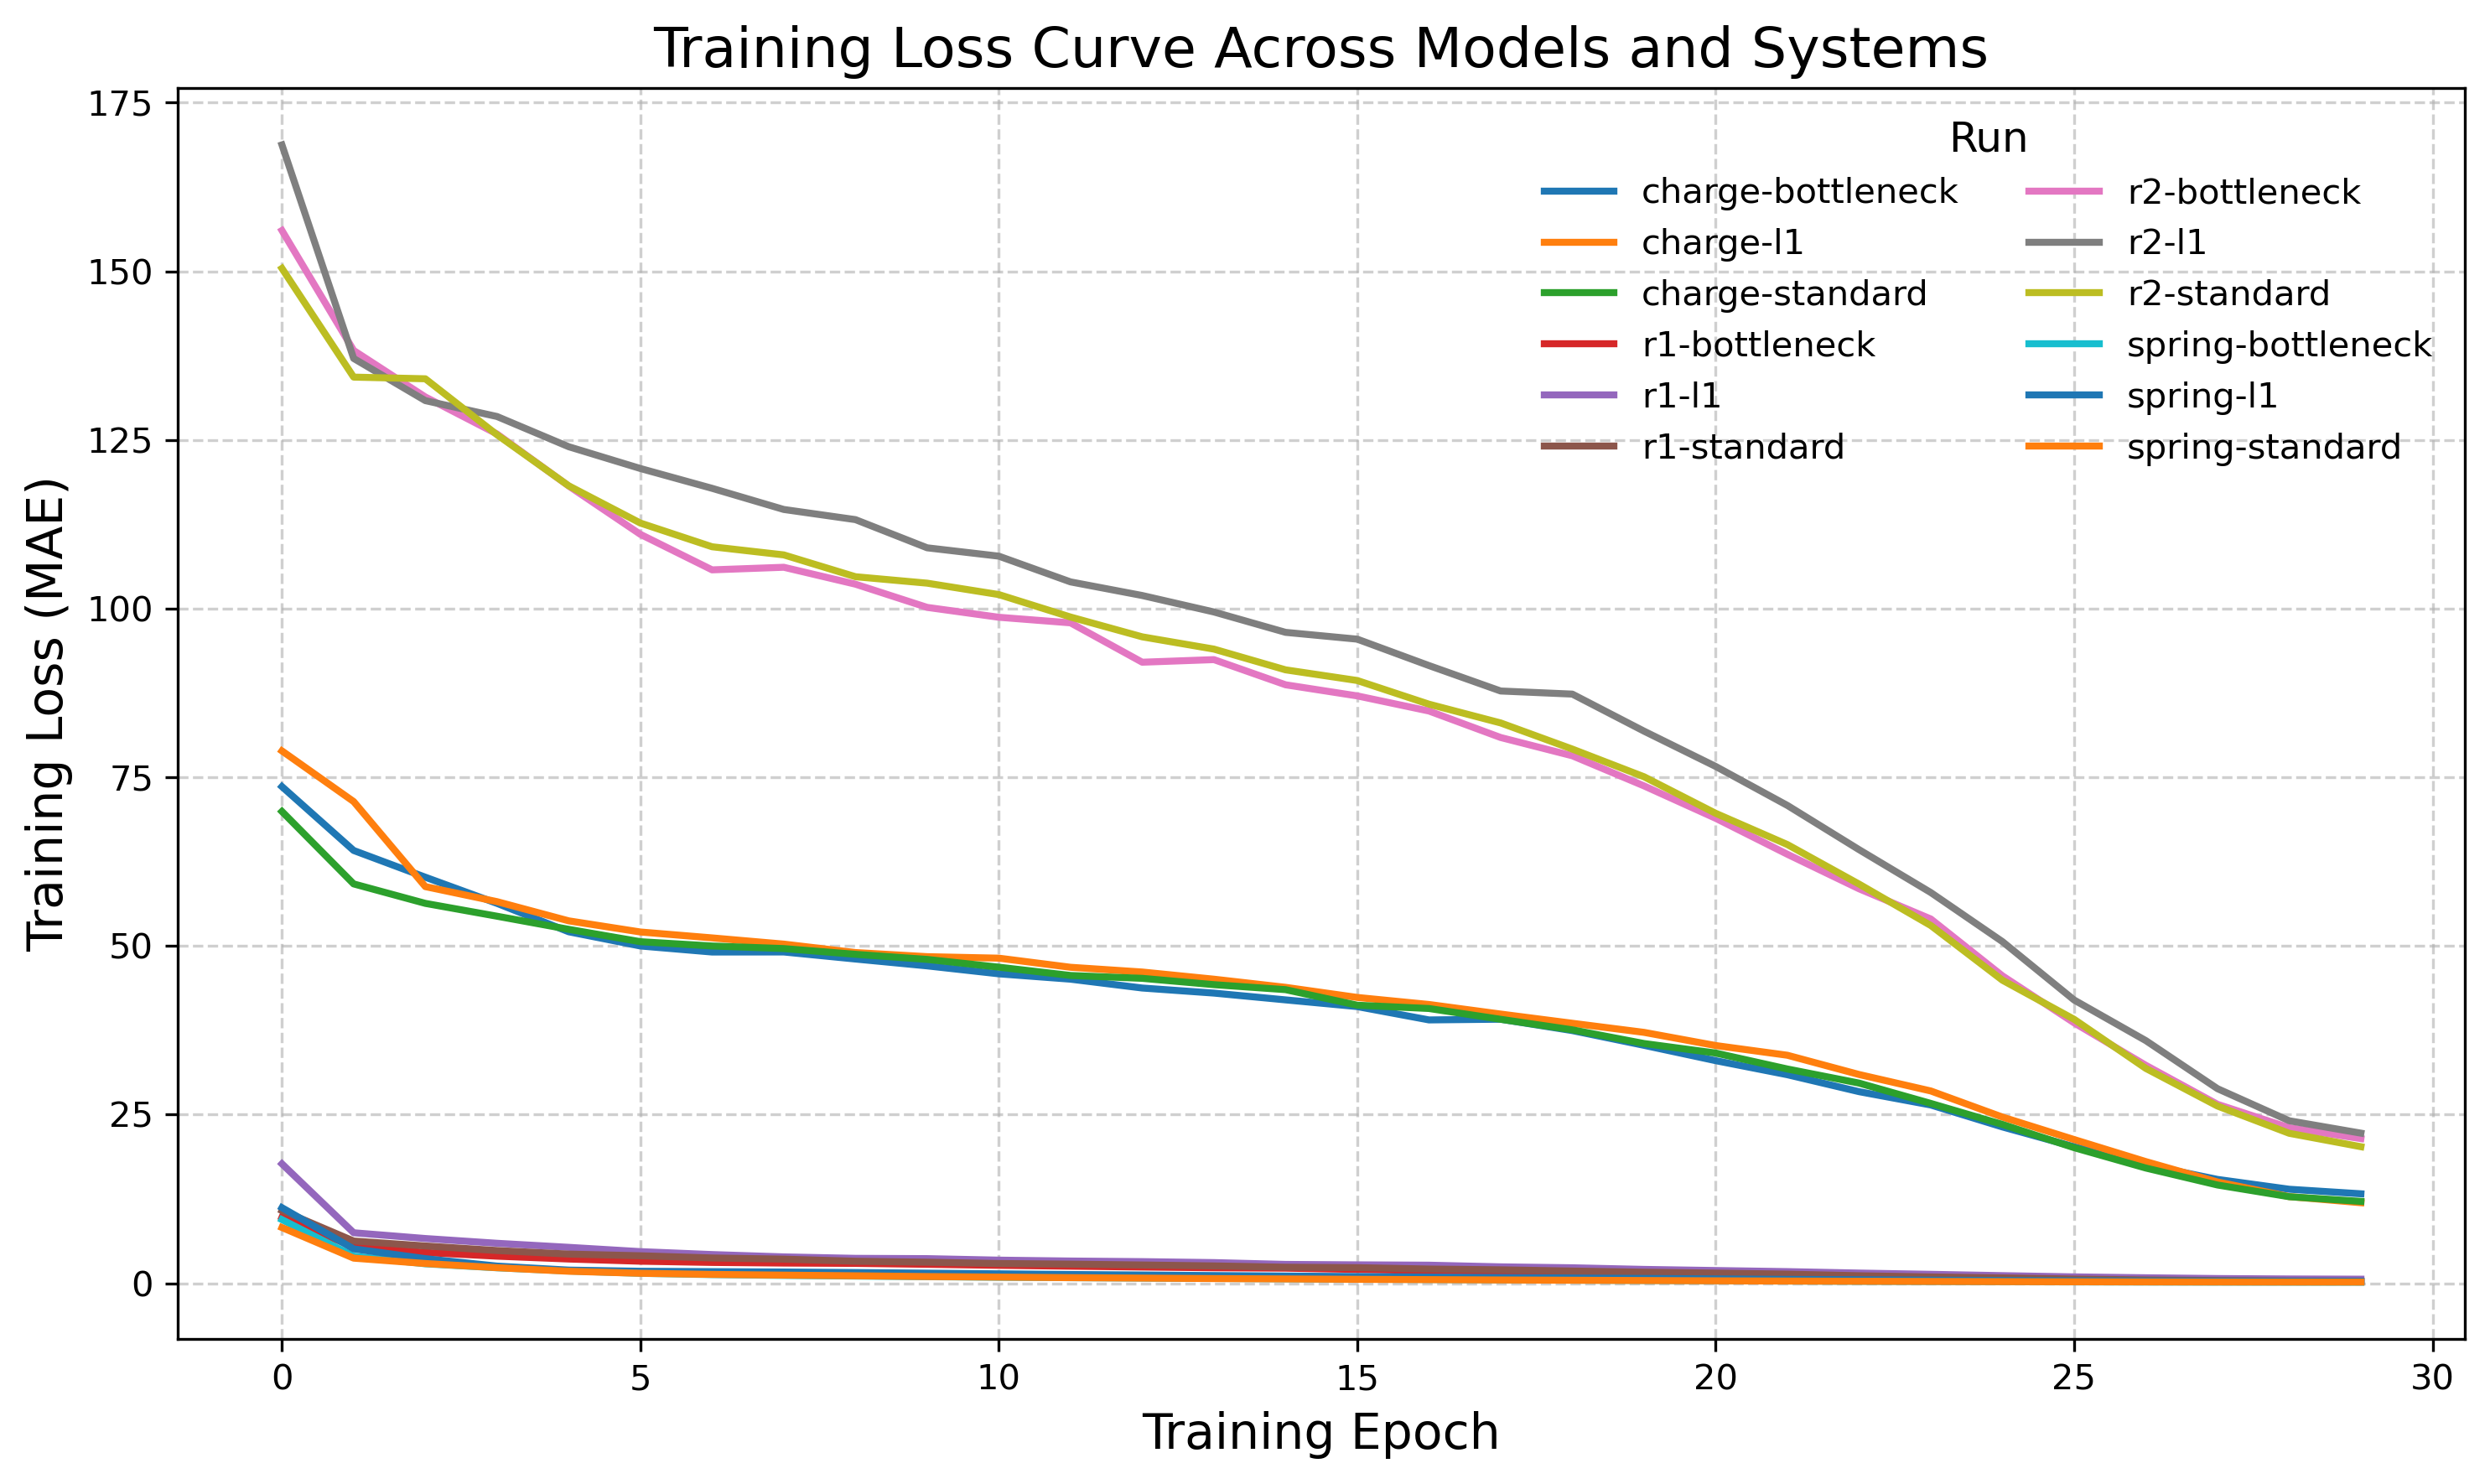

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the exported WandB CSV
df = pd.read_csv('training_loss.csv')

# Identify loss columns (those ending with ' - train_loss')
loss_cols = [col for col in df.columns if col.endswith(' - train_loss')]

# Melt into long format
melted = df.melt(id_vars='Step', value_vars=loss_cols,
                 var_name='Run', value_name='Train_Loss')

# Clean up legend labels: remove 'Train-' prefix and ' - train_loss' suffix
melted['Run_Clean'] = (melted['Run']
                       .str.replace(r'^Train-', '', regex=True)
                       .str.replace(r' - train_loss$', '', regex=True))

# Plot
plt.figure(figsize=(10, 6), dpi=300)
for run_name, group in melted.groupby('Run_Clean'):
    plt.plot(group['Step'], group['Train_Loss'], label=run_name, linewidth=2)

plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Training Loss (MAE)', fontsize=14)
plt.title('Training Loss Curve Across Models and Systems', fontsize=16)
plt.legend(title='Run', fontsize=10, title_fontsize=12,
           loc='upper right', ncol=2, frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()


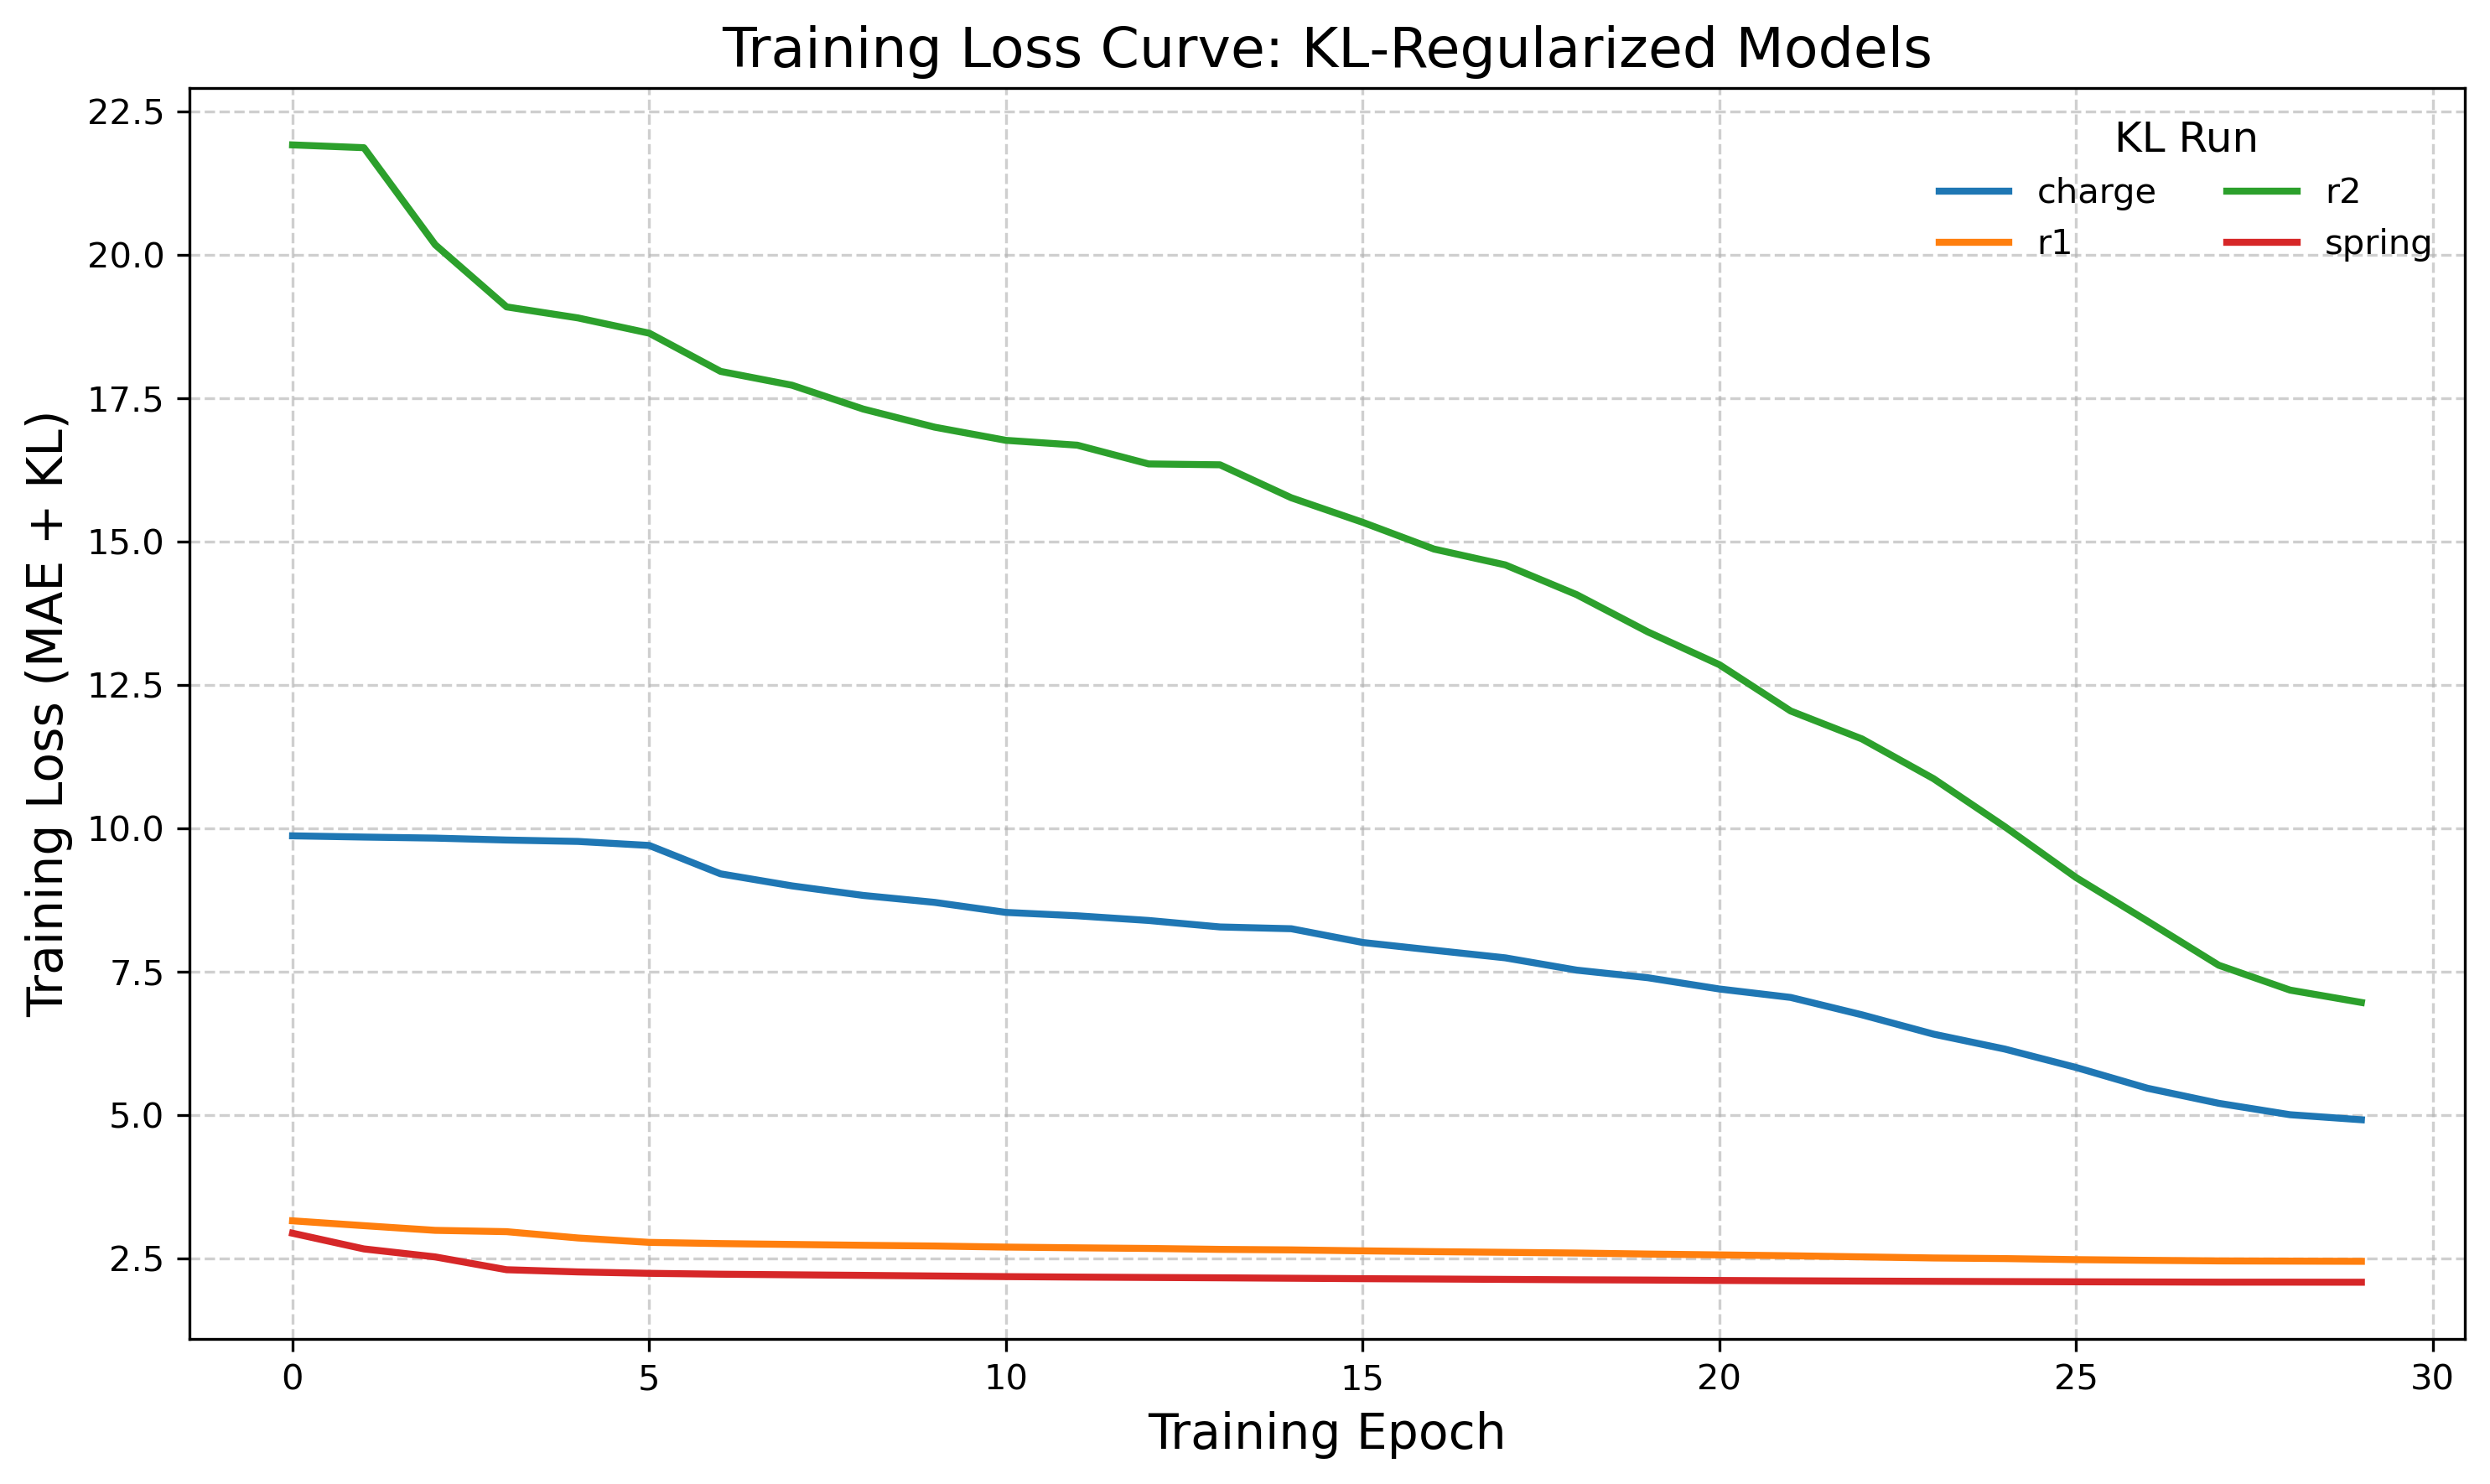

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the KL‐regularized WandB CSV
df_kl = pd.read_csv('training_loss_kl.csv')

# Identify loss columns (those ending with ' - train_loss')
loss_cols_kl = [col for col in df_kl.columns if col.endswith(' - train_loss')]

# Melt into long format
melted_kl = df_kl.melt(
    id_vars='Step',
    value_vars=loss_cols_kl,
    var_name='Run',
    value_name='Train_Loss'
)

# Clean up legend labels: remove 'Train-' prefix and ' - train_loss' suffix
melted_kl['Run_Clean'] = (
    melted_kl['Run']
    .str.replace(r'^Train-', '', regex=True)
    .str.replace(r' - train_loss$', '', regex=True)
)

# Plot
plt.figure(figsize=(10, 6), dpi=300)
for run_name, group in melted_kl.groupby('Run_Clean'):
    plt.plot(group['Step'], group['Train_Loss'], label=run_name, linewidth=2)

plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Training Loss (MAE + KL)', fontsize=14)
plt.title('Training Loss Curve: KL‐Regularized Models', fontsize=16)
plt.legend(title='KL Run', fontsize=10, title_fontsize=12,
           loc='upper right', ncol=2, frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()
